### Develop a natural network that can read handwritting

In [1]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique, argmax
import tensorflow as tf
from tensorflow import keras


In [2]:
#Loading the MNIST dataset:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


This code loads the MNIST dataset, which is a collection of handwritten digits (0-9) along with their corresponding labels. The dataset is split into training and testing sets.

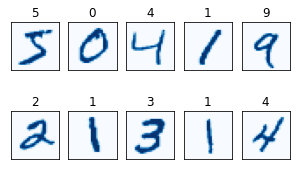

In [3]:

# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(10):
    ax =fig.add_subplot(2,5,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [4]:
#Preprocessing the data:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In this step, the input data x_train and x_test are reshaped to have a single channel (grayscale) dimension. The pixel values are also scaled to the range [0, 1] by dividing by 255.

In [5]:
#Building the model:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


This code defines a sequential model using Keras. The model consists of a flattening layer that converts the 2D input images into a 1D array, followed by a dense layer with 128 units and ReLU activation function. A dropout layer is added to prevent overfitting, and finally, a dense layer with 10 units (corresponding to the 10 digits) is added without an activation function.

In [6]:
#Compiling and training the model:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])


The code specifies the loss function (SparseCategoricalCrossentropy) and optimizer (adam) for the model. It then compiles the model with these settings. The model is trained using the training data (x_train and y_train) for 7 epochs.

In [7]:
#trains the compiled model using the provided training data.
model.fit(x_train, y_train, epochs=7)


Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2919 - accuracy: 0.9151
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9563
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9682
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9730
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0729 - accuracy: 0.9772
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9802
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9812


In [8]:
#Evaluating the model:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9782


[0.0685485228896141, 0.9782000184059143]

This code evaluates the trained model on the test data (x_test and y_test) and prints the loss and accuracy metrics.

In [9]:
#Making predictions:
prediction = model(x_train[:1]).numpy()
predictions = tf.nn.softmax(prediction).numpy()


The code makes predictions on a subset of the training data (x_train[:1]). The model returns logits, which are converted to probabilities using the softmax function.

In [10]:
#Creating a probability model:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


This code creates a new model (probability_model) by appending a softmax layer to the original model. This softmax layer converts the logits into probabilities.

In [11]:
predictions = probability_model(x_test[:5])


In [12]:
# Selecting an example image from the test set
example_image = x_test[18]
example_label = y_test[18]

# Reshape the image to match the input shape of the model
example_image = example_image.reshape((1, 28, 28, 1))

# Make predictions on the example image using the model
predictions = probability_model.predict(example_image)
predicted_label = np.argmax(predictions)




1/1 [==============================] - 0s 67ms/step


This code selects an example image and its corresponding label from the test set. The image is reshaped to match the input shape of the model. Predictions are made on the reshaped image using the probability_model, and the predicted label is obtained by finding the index with the highest probability.

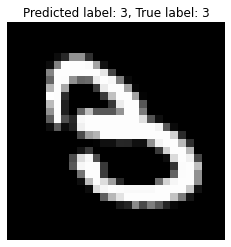

In [13]:
# Display the example image and predicted label
plt.imshow(example_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted label: {predicted_label}, True label: {example_label}")
plt.axis('off')
plt.show()

This code displays the example image using plt.imshow() and sets the title with the predicted label and the true label. The resulting plot shows the image along with the predicted label.